Import all libraries

In [43]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

Create dataframe object and read CSV

In [28]:
data = pd.read_csv('winequality-red.csv')

Print some file data

In [29]:
data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


Print data information and file information

In [30]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Check for null values in the data categories

In [31]:
nulls = pd.DataFrame(data.isnull().sum().sort_values(ascending=False)[:25])
nulls.columns = ['Null']
nulls.index.name = 'Feature'
print(nulls)

                      Null
Feature                   
quality                  0
alcohol                  0
sulphates                0
pH                       0
density                  0
total sulfur dioxide     0
free sulfur dioxide      0
chlorides                0
residual sugar           0
citric acid              0
volatile acidity         0
fixed acidity            0


Finding top correlated features based on quality of target label

In [32]:
numeric_features = data.select_dtypes(include=[np.number])
corr = numeric_features.corr()
print(corr['quality'].sort_values(ascending=False),'\n')

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64 



Creating a scatter plot of alcohol and quality

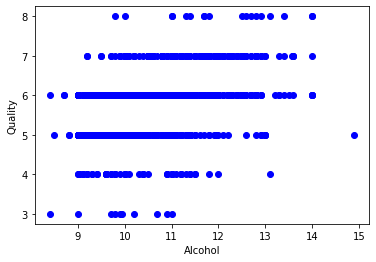

In [33]:
plt.scatter(data.alcohol, data[['quality']], color='blue')
plt.xlabel('Alcohol')
plt.ylabel('Quality')
plt.show()

Creating a scatter plot of sulfates and quality

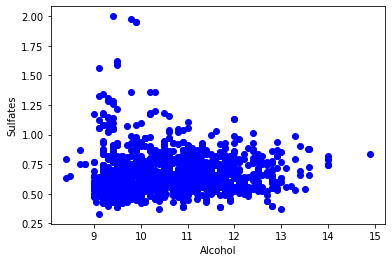

In [35]:
plt.scatter(data.alcohol, data[['sulphates']], color='blue')
plt.xlabel('Alcohol')
plt.ylabel('Sulfates')
plt.show()

Creating a scatter plot of citric acid and quality

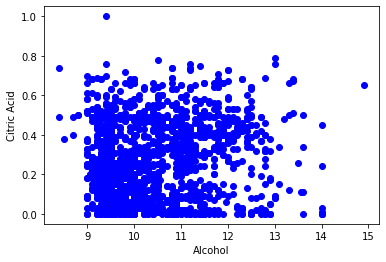

In [36]:
plt.scatter(data.alcohol, data[['citric acid']], color='blue')
plt.xlabel('Alcohol')
plt.ylabel('Citric Acid')
plt.show()

Removing the features that dont matter

In [37]:
a = data.drop(['fixed acidity','free sulfur dioxide', 'pH', 'chlorides', 'density', 'total sulfur dioxide', 'volatile acidity', 'residual sugar', 'quality'],axis=1)
b = data['quality']

Printing main columns after teh drop change has been made

In [38]:
a.head(10)

,citric acid,sulphates,alcohol
0,0.00,0.56,9.4
1,0.00,0.68,9.8
2,0.04,0.65,9.8
3,0.56,0.58,9.8
4,0.00,0.56,9.4
5,0.00,0.56,9.4
6,0.06,0.46,9.4
7,0.00,0.47,10.0
8,0.02,0.57,9.5
9,0.36,0.80,10.5


Creating training and testing dataset

In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(a, b, test_size=0.2)
print('Total rows: ', len(X_train))

Total rows:  1279


Linear Regression modelling 

In [47]:
linereg = linear_model.LinearRegression()
model = linereg.fit(X_train, Y_train)

coef = model.coef_
print ('Coefficients are: ', model.coef_)
print ("R-Sqaured is:", round(model.score(X_test, Y_test), 2))

Coefficients are:  [0.53665996 0.7283959  0.3300514 ]
R-Sqaured is: 0.36


Evaluation and Prediction

In [49]:
Y_pred = model.predict(X_test)

print("Residual sum of square MSE: %.2f" % np.mean((Y_pred - Y_test) ** 2))
print('Variance score: %.2f' % model.score(X_test, Y_test))

print ('RMSE: ', mean_squared_error(Y_test, Y_pred))

Residual sum of square MSE: 0.41
Variance score: 0.36
RMSE:  0.408437960848343


Creating another scatter plot of final data

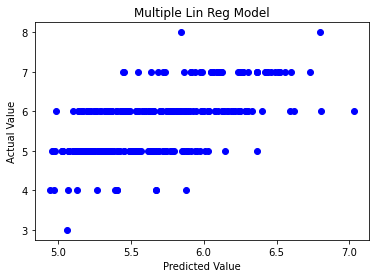

In [50]:
plt.scatter(Y_pred, Y_test, alpha=1, color='blue',)
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.title('Multiple Lin Reg Model')
plt.show()